In [1]:
## Import dependencies
import pandas as pd 
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from flask import Flask, jsonify, render_template
from sklearn.linear_model import LinearRegression
import yfinance as yf
from pathlib import Path
from pprint import pprint

## Get our data: 

### - Pull historical data for the market using the yfinance python library
### - Export the market historical data to a separate csv file in the folder labeled data_history_market

In [2]:
## Pull historical data for the market (market_ticker) using the yfinance python library
## Loop through list of tickers to pull the daily closing price and date for the last 10 years for each ticker
market_ticker = "^GSPC"
market_history_data_df= yf.download(tickers = market_ticker, start="2011-01-01")
market_history_df = market_history_data_df[["Close"]]
market_history_df.reset_index(level=0, inplace=True)
## Export the market historical data into it's own separate csv file
market_history_df.to_csv(f"resources/data_history_market/{market_ticker}.csv")
## Show first 5 rows of data frame
market_history_df.head()

[*********************100%***********************]  1 of 1 completed


,Date,Close
0,2011-01-03,1271.869995
1,2011-01-04,1270.199951
2,2011-01-05,1276.560059
3,2011-01-06,1273.849976
4,2011-01-07,1271.500000


### - Pull historical data for each stock (ticker) using the yfinance python library
### - Export each stock's historical data to a separate csv file in the folder labeled data_history_stocks folder

In [3]:
## Pull historical data for each stock (stock_tickers) using the yfinance python library
## Loop through list of tickers to pull the daily closing price and date for the last 10 years for each ticker
stock_tickers = ["ABT", "ABBV", "ABMD", "ACN", "ATVI", "ADBE", "AMD", "AAP", "AES", "AFL", "A", "APD", "AKAM", "ALK", "ALB", "ARE", "ALXN", "ALGN", "ALLE", "ALL", "AMZN", "AMCR", "AEE", "AAL", "AEP", "AXP", "AIG", "AMT", "AWK", "AMP", "ABC", "AME", "AMGN", "APH", "ADI", "ANSS", "ANTM", "AON", "AOS", "APA", "AAPL", "AMAT", "APT", "ADM", "ANET", "AJG", "AIZ", "ATO", "ADSK", "ADP", "AZO", "AVB", "AVY", "AVGO", "BKR", "BLL", "BAC", "BK", "BAX", "BDX", "BRK.B", "BBY", "BIO", "BIIB", "BLK", "BA", "BKNG", "BWA", "BXP", "BSX", "BMY", "BR", "BF.B", "BEN", "CHRW", "COG", "CDNS", "CZR", "CPB", "COF", "CAH", "CCL", "CARR", "CTLT", "CAT", "CBOE", "CBRE", "CDW", "CE", "CNC", "CNP", "CERN", "CF", "CRL", "CHTR", "CVX", "CMG", "CB", "CHD", "CI", "CINF", "CTAS", "CSCO", "C", "CFG", "CTXS", "CLX", "CME", "CMS", "CTSH", "CL", "CMCSA", "CMA", "CAG", "COP", "COO", "CPRT", "CTVA", "COST", "CCI", "CSX", "CMI", "CVS", "CRM", "DHI", "DHR", "DRI", "DVA", "DE", "DAL", "DVN", "DXCM", "DLR", "DFS", "DISCA", "DISCK", "DISH", "DG", "DLTR", "D", "DPZ", "DOV", "DOW", "DTE", "DUK", "DRE", "DD", "DXC", "DGX", "DIS", "ED", "EMN", "ETN", "EBAY", "ECL", "EIX", "EW", "EA", "EMR", "ENPH", "ETR", "EOG", "EFX", "EQIX", "EQR", "ESS", "EL", "ETSY", "EVRG", "ES", "EXC", "EXPE", "EXPD", "EXR", "FANG", "FFIV", "FB", "FAST", "FRT", "FDX", "FIS", "FITB", "FE", "FRC", "FISV", "FLT", "FMC", "F", "FTNT", "FTV", "FBHS", "FOXA", "FOX", "FCX", "GOOGL", "GOOG", "GLW", "GPS", "GRMN", "GNRC", "GD", "GE", "GIS", "GM", "GPC", "GILD", "GL", "GPN", "GS", "GWW", "HAL", "HBI", "HIG", "HAS", "HCA", "HSIC", "HSY", "HES", "HPE", "HLT", "HFC", "HOLX", "HD", "HON", "HRL", "HST", "HWM", "HPQ", "HUM", "HBAN", "HII", "IT", "IEX", "IDXX", "INFO", "ITW", "ILMN", "INCY", "IR", "INTC", "ICE", "IBM", "IP", "IPG", "IFF", "INTU", "ISRG", "IVZ", "IPGP", "IQV", "IRM", "JKHY", "J", "JBHT", "JNJ", "JCI", "JPM", "JNPR", "KMX", "KO", "KSU", "K", "KEY", "KEYS", "KMB", "KIM", "KMI", "KLAC", "KHC", "KR", "LNT", "LB", "LHX", "LH", "LRCX", "LW", "LVS", "LEG", "LDOS", "LEN", "LLY", "LNC", "LIN", "LYV", "LKQ", "LMT", "L", "LOW", "LUMN", "LYB", "LUV", "MMM", "MO", "MTB", "MRO", "MPC", "MKTX", "MAR", "MMC", "MLM", "MAS", "MA", "MKC", "MXIM", "MCD", "MCK", "MDT", "MRK", "MET", "MTD", "MGM", "MCHP", "MU", "MSFT", "MAA", "MHK", "MDLZ", "MPWR", "MNST", "MCO", "MS", "MOS", "MSI", "MSCI", "NDAQ", "NTAP", "NFLX", "NWL", "NEM", "NWSA", "NWS", "NEE", "NLSN", "NKE", "NI", "NSC", "NTRS", "NOC", "NLOK", "NCLH", "NOV", "NRG", "NUE", "NVDA", "NVR", "NXPI", "NOW", "ORLY", "OXY", "ODFL", "OMC", "OKE", "ORCL", "OTIS", "O", "PEAK", "PCAR", "PKG", "PH", "PAYX", "PAYC", "PYPL", "PENN", "PNR", "PBCT", "PEP", "PKI", "PRGO", "PFE", "PM", "PSX", "PNW", "PXD", "PNC", "POOL", "PPG", "PPL", "PFG", "PG", "PGR", "PLD", "PRU", "PTC", "PEG", "PSA", "PHM", "PVH", "PWR", "QRVO", "QCOM", "RE", "RL", "RJF", "RTX", "REG", "REGN", "RF", "RSG", "RMD", "RHI", "ROK", "ROL", "ROP", "ROST", "RCL", "SCHW", "STZ", "SJM", "SPGI", "SBAC", "SLB", "STX", "SEE", "SRE", "SHW", "SPG", "SWKS", "SNA", "SO", "SWK", "SBUX", "STT", "STE", "SYK", "SIVB", "SYF", "SNPS", "SYY", "T", "TAP", "TMUS", "TROW", "TTWO", "TPR", "TGT", "TEL", "TDY", "TFX", "TER", "TSLA", "TXN", "TXT", "TMO", "TJX", "TSCO", "TT", "TDG", "TRV", "TRMB", "TFC", "TWTR", "TYL", "TSN", "UDR", "ULTA", "USB", "UAA", "UA", "UNP", "UAL", "UNH", "UPS", "URI", "UHS", "UNM", "VLO", "VTR", "VRSN", "VRSK", "VZ", "VRTX", "VFC", "VIAC", "VTRS", "V", "VNO", "VMC", "WRB", "WAB", "WMT", "WBA", "WM", "WAT", "WEC", "WFC", "WELL", "WST", "WDC", "WU", "WRK", "WY", "WHR", "WMB", "WLTW", "WYNN", "XRAY", "XOM", "XEL", "XLNX", "XYL", "YUM", "ZBRA", "ZBH", "ZION", "ZTS"]
for stock_ticker in stock_tickers:
    stock_history_data_df= yf.download(tickers = stock_ticker, start="2011-01-01")
    stock_history_df = stock_history_data_df[["Close"]]
    stock_history_df.reset_index(level=0, inplace=True)
    ## Export each stock's historical data into it's own separate csv file
    stock_history_df.to_csv(f"resources/data_history_stocks/{stock_ticker}.csv")
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

## Calculate linear regression for market
### Market ticker symbol: ^GSPC

In [4]:
## Create path to sp500 csv and import data to dataframe
market_path = "resources/data_history_market/^GSPC.csv"
market_df = pd.read_csv(market_path)
## Rename index column from 'Unnamed: 0' to 'Day Number' 
    ##(header for index is blank in csv file, couldn't figure out how to fix in initial loop before exporting data to CSVs)
## Rename closing price column from 'Close' to 'Price'
market_df.rename(columns={"Unnamed: 0": "Day Number", 
                          "Date": "Date", 
                          "Close": "Price"}, inplace = True)
## Show first 5 rows of data frame
market_df.head()

,Day Number,Date,Price
0,0,2011-01-03,1271.869995
1,1,2011-01-04,1270.199951
2,2,2011-01-05,1276.560059
3,3,2011-01-06,1273.849976
4,4,2011-01-07,1271.500000


In [5]:
## Create path to historical market data
market_file = "resources/data_history_market/^GSPC.csv"
## Use linear regression to find slope and y intercept of sp500 data
market_model = LinearRegression()
market_model.fit(np.array(market_df["Day Number"]).reshape(-1,1), market_df["Price"])
market_slope = market_model.coef_
market_intercept = market_model.intercept_
market_score = market_model.score(np.array(market_df["Day Number"]).reshape(-1,1), market_df["Price"])
market_file_name = str(market_file).replace("^GSPC", "Market").replace(".csv","").replace("resources/data_history_market/","")
#print(f"{file_name}: y = {(slope)}x + {intercept}")
print(f"{market_file_name}: slope = {market_slope}: score = {market_score}")

Market: slope = [0.91567333]: score = 0.9305977469097396


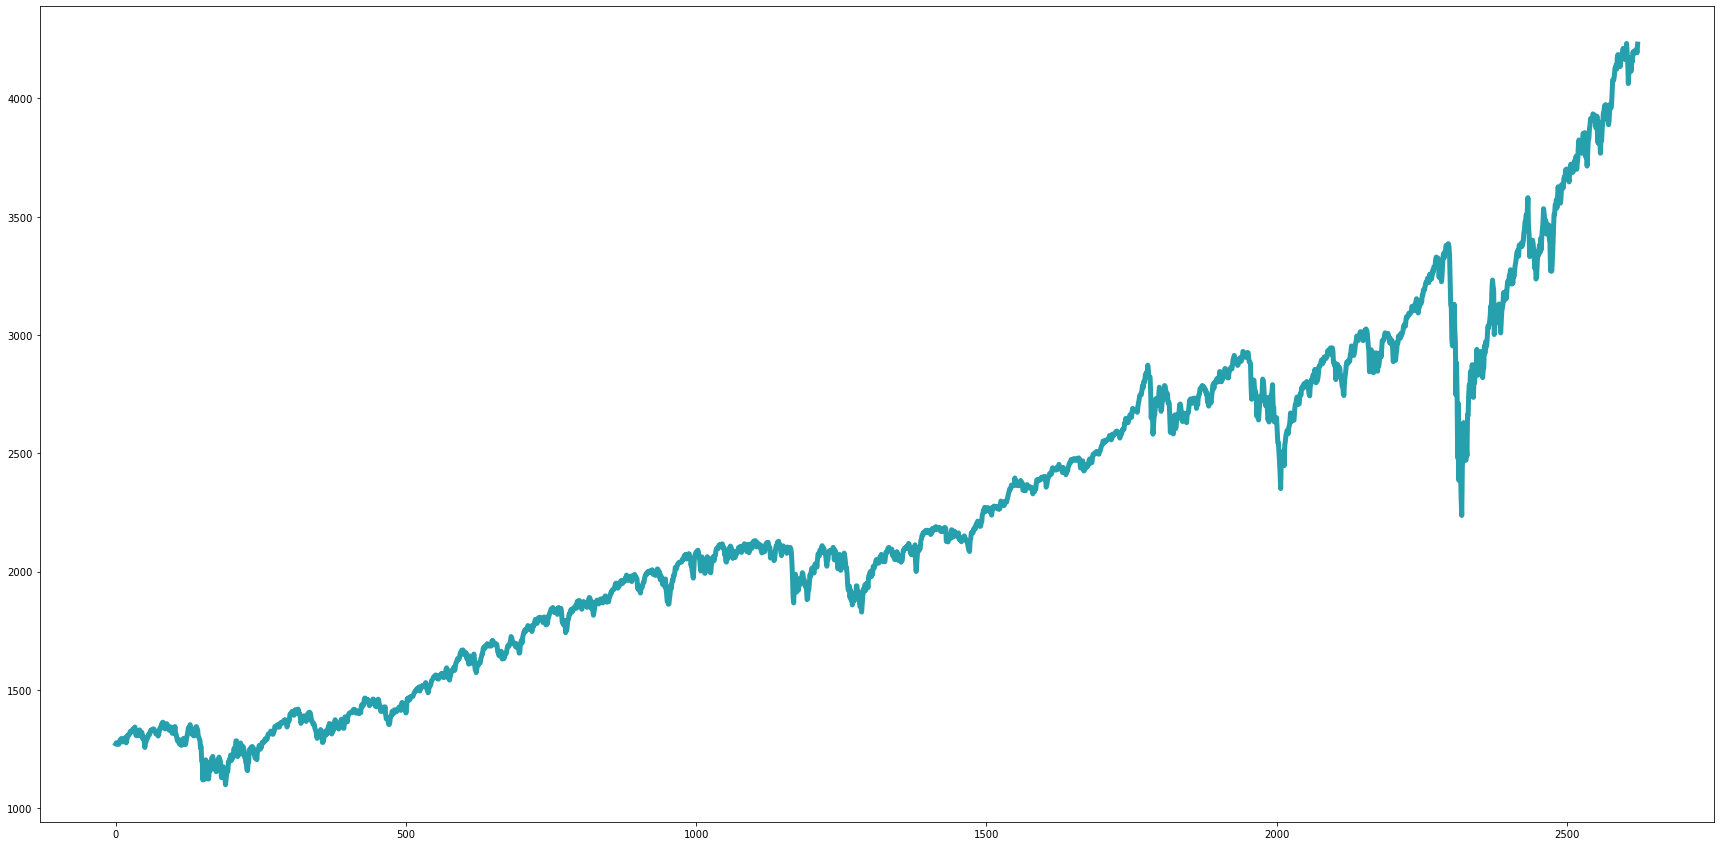

In [6]:
## Plot market data
plt.figure(figsize=(30,15))
plt.plot(market_df["Day Number"], market_df["Price"], c="#26a0ad", linewidth=5)
###### Will need to format graph and save to image file ######
# plt.savefig("static/img/data_history_market.png")
# plt.show()

In [7]:
## Calculate regression line of market
market_reg = [market_slope * day + market_intercept for day in market_df["Day Number"]]

In [8]:
#type(market_reg)

In [9]:
#pprint(market_reg)

In [10]:
### Put historical market data regression values into data frame and export to market_regression.cvs in data_results folder

## note: market_reg is a list of values
market_reg_raw_df = pd.DataFrame(market_reg)
market_reg_raw_df.to_csv("resources/data_results/scratch/market_reg_raw_df.csv")
market_reg_raw_path = "resources/data_results/scratch/market_reg_raw_df.csv"
market_reg_df = pd.read_csv(market_reg_raw_path)
market_reg_df.rename(columns={"0": "Regression"}, inplace = True)
market_reg_df.to_csv("resources/data_results/market_regression.csv")

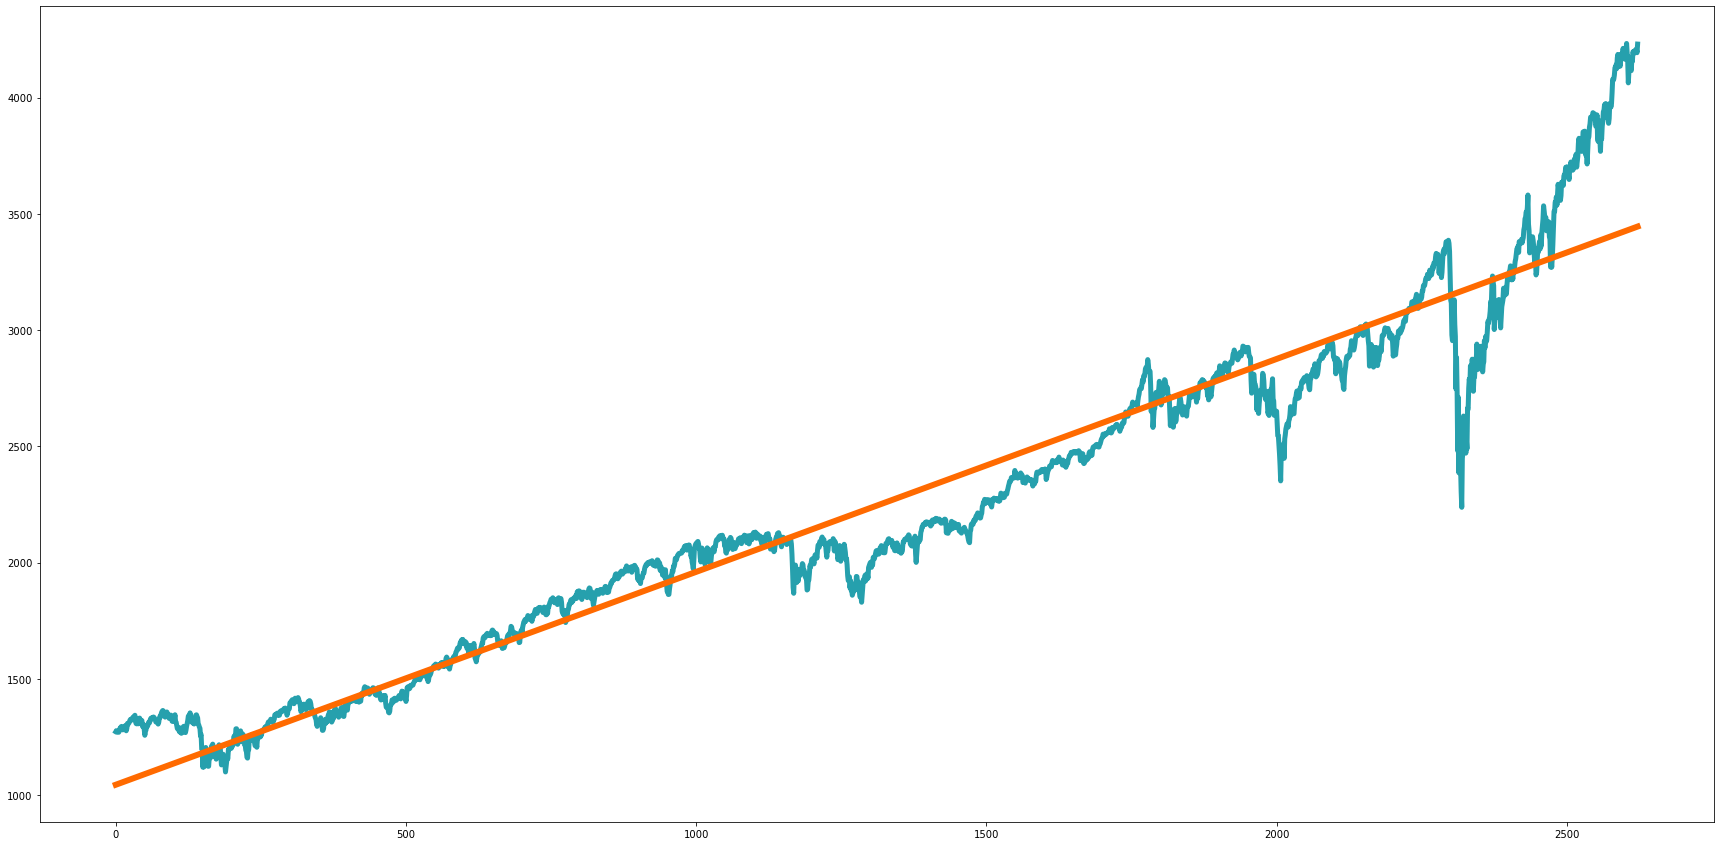

In [11]:
## Plot market data and market regression line and save graph to image file
plt.figure(figsize=(30,15))
plt.plot(market_df["Day Number"], market_df["Price"], c="#26a0ad", linewidth=5)
plt.plot(market_df["Day Number"], market_reg, c="#ff6a00", linewidth=6)
###### Will need to format graph and save to image file ######
# plt.savefig("static/img/data_history_reg_market.png")
# plt.show()

## Calculate linear regressions: slopes, y-intercepts, and scores
### - Loop through all csvs in data_stocks_history folder

In [12]:
## Create empty lists to store results
all_stocks_results = []
all_stocks_list = []
winning_stocks_results = []
winning_stocks_list = []
losing_stocks_results = []
losing_stocks_list = []
worst_stocks_list = []
runnerup_stocks_list = []

In [13]:
## Define error log file
error_log = open("errors.log", "a")
error_count = 0
## Use pathlib to loop through all csvs in data_tickers folder 
folder = "resources/data_history_stocks"
for file in Path(folder).glob("*.csv"):
    ## Create empty lists to store slopes for all stocks, winning stocks, and losing stocks
    try:
        stock_df = pd.read_csv(file)
        stock_df.rename(columns={"Unnamed: 0": "Day Number", 
                                 "Date": "Date", 
                                 "Close": "Price"}, inplace = True)
        ## Use linear regression to find slope, y intercept, and regression of historical market data
        stock_model = LinearRegression()
        stock_model.fit(np.array(stock_df["Day Number"]).reshape(-1,1), stock_df["Price"])
        stock_slope = stock_model.coef_
        stock_intercept = stock_model.intercept_
        stock_score = stock_model.score(np.array(stock_df["Day Number"]).reshape(-1,1), stock_df["Price"])
        file_name = str(file).replace(".csv","").replace("resources\\data_history_stocks\\","")
        #print(f"{file_name}: y = {(slope)}x + {intercept}")
        #print(f"{file_name}: slope = {(stock_slope)}: score = {stock_score}")
        ## Calculate regression line of stocks
        ## Append all stock results to lists
        all_stocks_results.append({"Stock": file_name, "Slope": stock_slope, "Y-intercept": stock_intercept, "Score": stock_score})
       # all_stocks_list.append({"Stock": file_name})
        all_stocks_list.append(file_name)
        
    except Exception as e:
        error_log.write(str(file))
        error_log.write(str(e))
        error_log.write("")
        error_count += 1
     ## If else for winning stocks
    if stock_slope > market_slope:
        winning_stocks_results.append({"Stock": file_name, "Slope": stock_slope, "Y-intercept": stock_intercept, "Score": stock_score})
        winning_stocks_list.append(file_name)
    else:
        losing_stocks_results.append({"Stock": file_name, "Slope": stock_slope, "Y-intercept": stock_intercept, "Score": stock_score})
        losing_stocks_list.append(file_name)
        
error_log.close()
print(f"Encountered {error_count} errors")

Encountered 3 errors


In [14]:
winning_stocks_list

['AMZN', 'NVR']

In [15]:
## Load all_stocks_results (list of dictionaries) into a Data Frame
all_stocks_results_df = pd.DataFrame(all_stocks_results)
## Export all_stocks_results data frame into it's own separate csv file
all_stocks_results_df.to_csv("resources/data_results/all_stocks_results.csv")
## Show first 5 rows of new dataframe
all_stocks_results_df.head()

,Stock,Slope,Y-intercept,Score
0,A,[0.030670449470024706],13.859910,0.812693
1,AAL,[0.006599130718557561],20.473385,0.112110
2,AAP,[0.037212528093538366],76.996240,0.527757
3,AAPL,[0.033017379653274524],-3.322469,0.690018
4,ABBV,[0.028137085222355175],42.528080,0.734616


In [16]:
## Load winning_stocks_results (list of dictionaries) into a Data Frame
winning_stocks_results_df = pd.DataFrame(winning_stocks_results)
## Export winning_stocks_results data frame into it's own separate csv file
winning_stocks_results_df.to_csv("resources/data_results/winning_stocks_results.csv")
## Show first 5 rows of new dataframe
winning_stocks_results_df.head()

,Stock,Slope,Y-intercept,Score
0,AMZN,[1.10484758236394],-424.405852,0.820469
1,NVR,[1.4741055836098944],82.811433,0.885639


In [17]:
# ## Load losing_stocks_results (list of dictionaries) into a Data Frame
losing_stocks_results_df = pd.DataFrame(losing_stocks_results)
## Export losing_stocks_results data frame into it's own separate csv file
losing_stocks_results_df.to_csv("resources/data_results/losing_stocks_results.csv")
## Show first 5 rows of new dataframe
losing_stocks_results_df.head()

,Stock,Slope,Y-intercept,Score
0,A,[0.030670449470024706],13.859910,0.812693
1,AAL,[0.006599130718557561],20.473385,0.112110
2,AAP,[0.037212528093538366],76.996240,0.527757
3,AAPL,[0.033017379653274524],-3.322469,0.690018
4,ABBV,[0.028137085222355175],42.528080,0.734616


In [18]:
## Grab the 10 worst stocks and put results into their own Data Frame
# Sorting the DataFrame based on "Slope" column
# Will sort from lowest to highest if no other parameter is passed
worst_stocks_results_df = all_stocks_results_df.sort_values("Slope")
# Reset the index so that the index is now based on the sorting locations
worst_stocks_results_df = worst_stocks_results_df.reset_index(drop=True)
## Drop all rows except first 10
worst_stocks_results_df.drop(worst_stocks_results_df.index[10:], inplace=True)
## Export worst_stocks_results data frame into it's own separate csv file
worst_stocks_results_df.to_csv("resources/data_results/worst_stocks_results.csv")
## Show new dataframe
worst_stocks_results_df 

,Stock,Slope,Y-intercept,Score
0,KHC,[-0.0469475987545335],93.423922,0.743632
1,APA,[-0.03836289644231998],109.366525,0.893787
2,PRGO,[-0.031489714593205896],138.970503,0.341416
3,RL,[-0.027683557817582288],161.007197,0.426460
4,IBM,[-0.02747376199598605],196.076844,0.659919
5,OXY,[-0.025684003928287662],102.662212,0.690018
6,NOV,[-0.02443139152123535],76.918339,0.794237
7,DVN,[-0.02396731419480716],76.980977,0.806010
8,SLB,[-0.023715273424911948],97.841726,0.574901
9,MOS,[-0.019367781037619613],63.621256,0.791186


In [19]:
## Grab the 10 runner-up stock results and put into their own Data Frame
runnerup_stocks_results_df = losing_stocks_results_df.sort_values("Slope",ascending=False)
## Reset the index so that the index is now based on the sorting locations
runnerup_stocks_results_df = runnerup_stocks_results_df.reset_index(drop=True)
## Drop all rows except first 10
runnerup_stocks_results_df.drop(runnerup_stocks_results_df.index[10:], inplace=True)
## Export runnerup_stocks_results data frame into it's own separate csv file
runnerup_stocks_results_df.to_csv("resources/data_results/runnerup_stocks_results.csv")
## Show new dataframe
runnerup_stocks_results_df 

,Stock,Slope,Y-intercept,Score
0,BKNG,[0.666985934307855],479.268036,0.868494
1,GOOG,[0.578607344181096],62.469546,0.879429
2,GOOGL,[0.5770421106694515],71.230727,0.888064
3,AZO,[0.3601499112448349],216.480412,0.859887
4,MTD,[0.34917389316160735],-0.623806,0.863670
5,CMG,[0.26945917065636243],213.881891,0.469004
6,ISRG,[0.24083591424045958],-3.674168,0.808996
7,EQIX,[0.23739802442596358],33.465533,0.909350
8,CHTR,[0.21617259994661445],-27.561158,0.902055
9,PAYC,[0.20991896009878094],-55.343142,0.841577


NameError: name 'stock_reg' is not defined

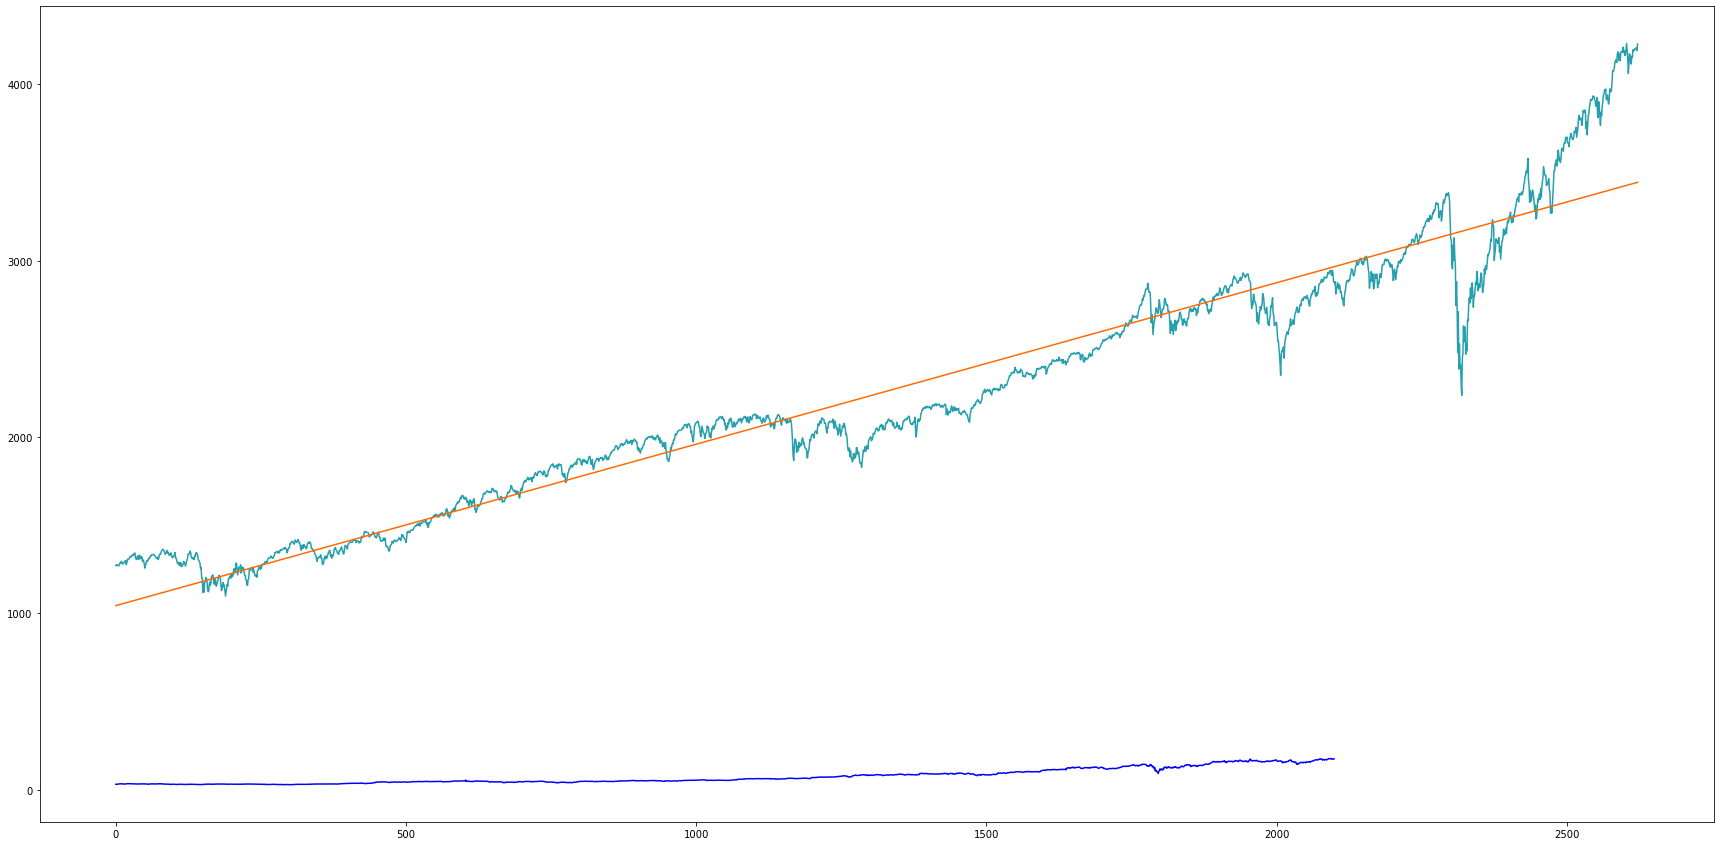

In [21]:
### Needs work
## Plot graphs for winning stocks and market
plt.figure(figsize=(30,15))
plt.plot(market_df["Day Number"], market_df["Price"], c="#26a0ad")
plt.plot(market_df["Day Number"], market_reg, c="#ff6a00")
     ## Plot stock data and stock regression line for winning stocks
plt.plot(stock_df["Day Number"], stock_df["Price"], c="blue")
plt.plot(stock_df["Day Number"], stock_reg, c="red")
###### Will need to format graph and save to image file ######


In [ ]:
#### Need regression csvs for: winning stocks, worst stocks, and runnerup stocks

In [ ]:
#### Need to format/cleanup the graphs to look professional before exporting to image files

In [ ]:
#### Need graphs and export graphs as images for: winning stocks, worst stocks, and runnerup stocks

In [ ]:
#### Would like to: have histrical stock data csvs for all winning stocks, worst stocks, and runnerup stocks
###### saved in each corresponding folder in data_results folder. 
#### Would like to use for loop, but might have to do individually for time's sake